# The aim of the project is to detect and classify defected parts on metal sheet in automotive sector. 



## PART 1_DATA PROCESSING 

To able to establish a library for metal sheet , we constructed a camera station as below

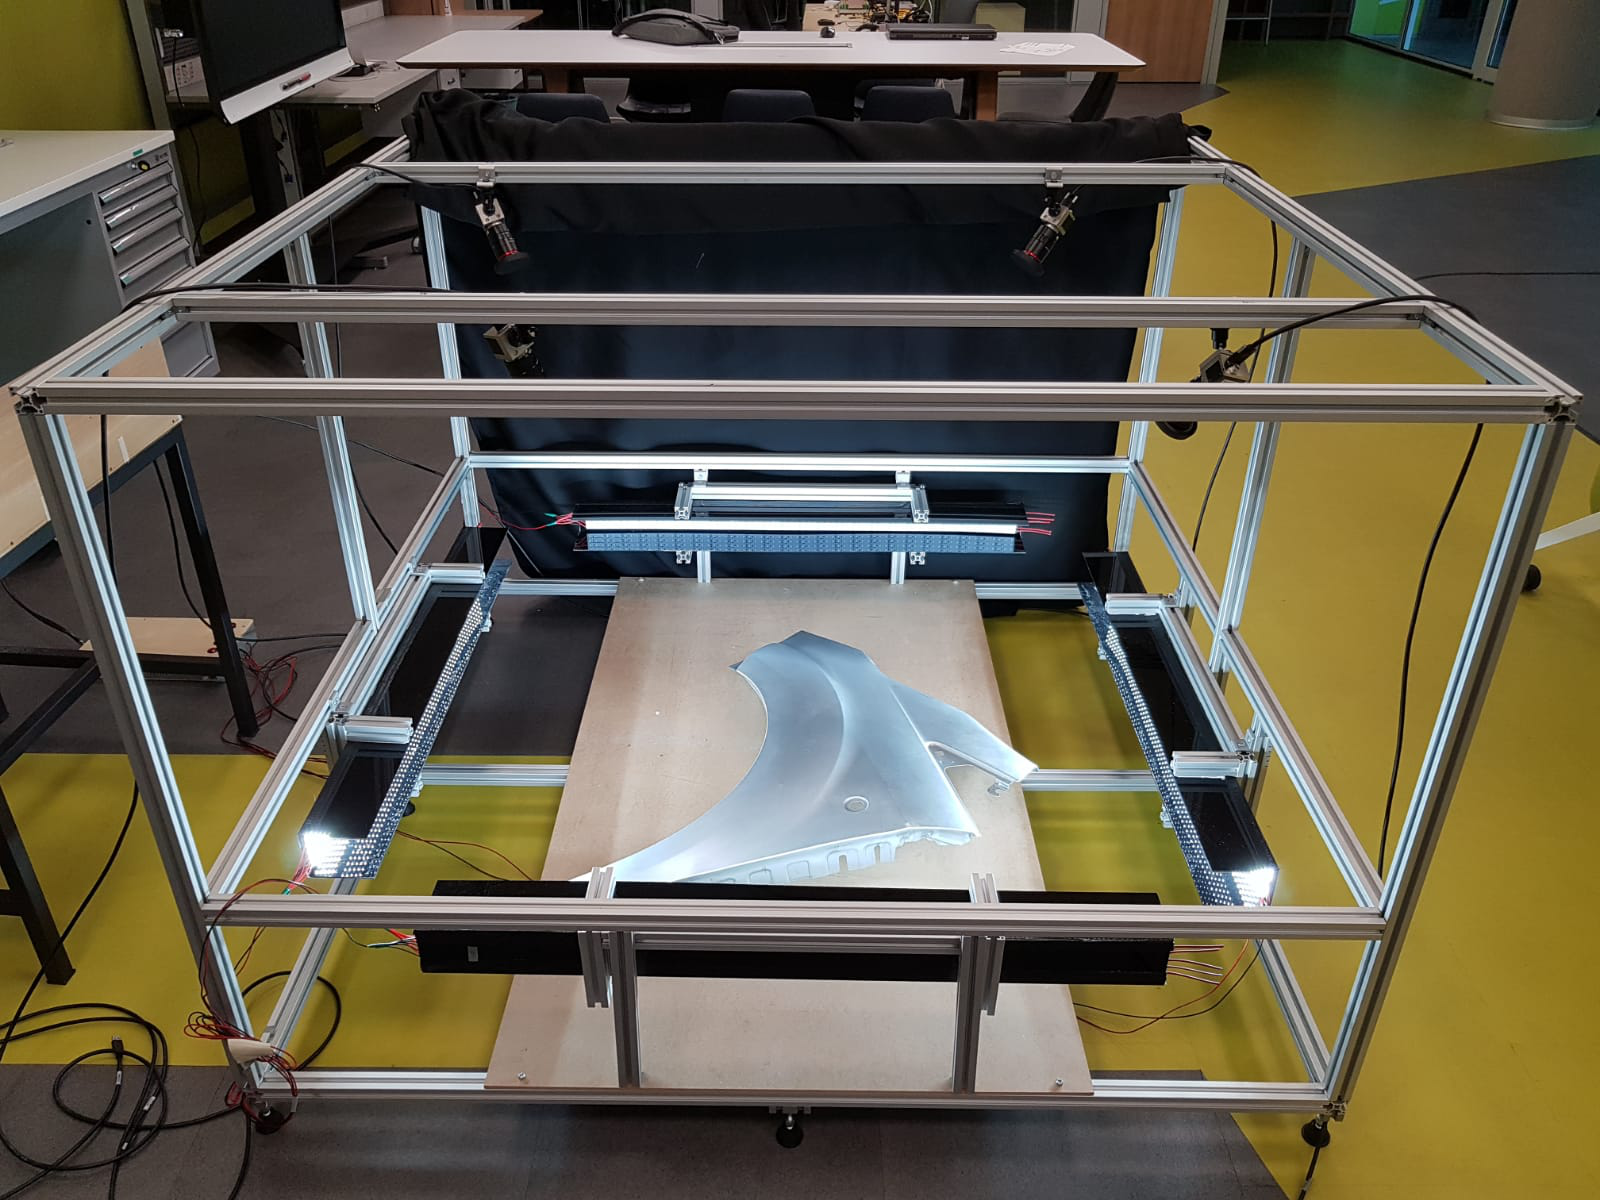

In [2]:
from PIL import Image 
import seaborn as sns
import matplotlib.pyplot as plt

img = Image.open("./report/camera_st.jpeg")
img

Dark Field Lighting implemented 

    •	Color : White  

    •	Voltage : DC 12V 
    
    •	Power 18W / MT 
    
    •	Dimension : 1 MT x5
    
    •	Light Flux : 1620 LÜMEN 
    
    •	Current : 1.50A / MT 
    
    •	IP : 20 
For cameras & lens 
    4 Cameras used to take pictures 
    
    •	Basler 107413 acA4112-20um 4096x3000, 20fps, mono1.1” USB3.0
    
    •	Kowa LM8FC 1.1” F2.5 8,5 mm 12 MPix lens 


### Insufficient sample size challenging

When I started the project I had only 5 defected samples and 1 ok samples. We took pictures by 4 cameras with different angles. I got 125 Nok and 21 ok images with different angles and cameras(all pictures under “first_images” folder. The samples size is not enough to make a classification therefore I have to increase sample size. I have overcame this problem by creating many type defects manually like scratches , pimples , dents than took up these defects as created 100X100 size square from whole image. To able to get these images,sequentially;


 1) Loop to read files in folder one by one 

 2) Open image file and its filter file to pull out the image from background(note : to decide the which filter is suitable , I used this code ([click here to see the code](report/Filter_decision_notebook.ipynb#section_id1)) 
 
 3) Group failure modes by color codes in filter, Red: Pimple, Green: Dent, Blue: Scratch 
 
 4) Find the center location of each color group and create square images based on that center and save image
 
 5) Another filter executed for sub images according to color scale that means I separated images that are under 20 or above 250 pixels. All images saved under folder as DataSet_Nok and DataSet_Ok 
 
  ([click here to see the code](report/PopulateErrorImages-checkpoint.ipynb#section_id2) )
  
  Similar approach has been executed for ok image as well ([click here to see the code](report/PopulateOKImages-checkpoint.ipynb#section_id3) )
  
   
   


# PART 2_SVM MODEL EXECUTION

After processing all data , I had 9402 images both from ok and nok, totaly 18804 images 

I executed support vector machine (SVM) ,the results have been shared inside the code ([click here to see the code](report/Deep_learning.ipynb#section_id5))

# PART 3_NEURAL NETWORK EXECUTION

In neural network part we did not focused on pre-proccesing like filtiring.However we benefit from same pipeline to seperate main image and resize the images. Because as it well known neural networks can work with raw data. 
([click here to see the code](report/SVM.ipynb#section_id4))

In order to create deep learning algorithm we used Keras which benefit from Tensorflow. During this project we installed Keras on CPU. Keras works on GPU may perform better in many way however out setup is stronger interms of CPU.

You can also see architecture of our convolutional neural network.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 49, 49, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 96)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 96)        384       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 96)          83040     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          55360     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 1, 64)          256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       

Total params: 263,810
Trainable params: 263,106
Non-trainable params: 704
_________________________________________________________________